# Accélérer vos codes avec Python

Reconstruire la roue n'est pas efficace !

Utilisez les fonctions "universelles" de Python, Numpy...

In [1]:
liste = list(range(100000))

In [2]:
%%timeit
somme = sum(liste)

1.07 ms ± 5.12 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [3]:
%%timeit
somme = 0
for val in liste:
    somme += val

3.06 ms ± 63.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Un autre exemple

In [1]:
def compte_lettre(texte,alphabet):
    return { l:texte.count(l) for l in alphabet }
     
def compte_lettre2(texte):
    d = { }
    for c in texte: 
        d[c] = d.get(c,0)+1
    return d

In [3]:
texte = "Le langage Python est placé sous une licence libre proche de la licence BSD"
alphabet = [ chr(65+i) for i in range(0,26) ]

In [15]:
%%timeit
res = compte_lettre(texte,alphabet) 

5.76 µs ± 126 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [16]:
%%timeit
res = compte_lettre2(texte)

9.52 µs ± 117 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


On devra profiler son code pour l'optimiser, pour cela on utilise :
- `%prun`
- le module `cProfile`

In [13]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python  %%python2  %%

In [14]:
%whos

Variable         Type        Data/Info
--------------------------------------
alphabet         list        n=26
compte_lettre    function    <function compte_lettre at 0x000001A9C5AB18C8>
compte_lettre2   function    <function compte_lettre2 at 0x000001A9C5AB1AE8>
res              dict        n=24
texte            str         Le langage Python est pla<...> proche de la licence BSD


In [12]:
%%prun 
res = compte_lettre2(texte*10000)

In [15]:
import cProfile

In [19]:
cProfile.run(compte_lettre2(texte*10000))

         2 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




TypeError: exec() arg 1 must be a string, bytes or code object

# Utilisation de Numba

On peut utiliser Numba pour compiler du code à la volée. En voici un exemple :


In [20]:
from matplotlib.pylab import imshow, jet, show, ion
import numpy as np
%matplotlib inline
from numba import jit

In [25]:
@jit
def mandel(x, y, max_iters):
    """
    Given the real and imaginary parts of a complex number,
    determine if it is a candidate for membership in the Mandelbrot
    set given a fixed number of iterations.
    """
    i = 0
    c = complex(x,y)
    z = 0.0j
    for i in range(max_iters):
        z = z*z + c
        if (z.real*z.real + z.imag*z.imag) >= 4:
            return i

    return 255

In [26]:
@jit
def create_fractal(min_x, max_x, min_y, max_y, image, iters):
    height = image.shape[0]
    width = image.shape[1]

    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height
    for x in range(width):
        real = min_x + x * pixel_size_x
        for y in range(height):
            imag = min_y + y * pixel_size_y
            color = mandel(real, imag, iters)
            image[y, x] = color

    return image

Wall time: 45.9 ms


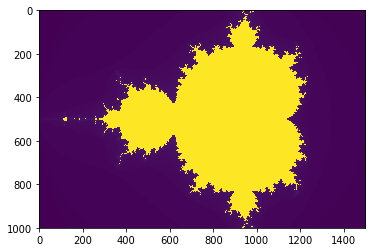

In [29]:
image = np.zeros((500 * 2, 750 * 2), dtype=np.uint8)
%time create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20)
imshow(image)

**Exercices :** Essayez avec d'autres fonctions

Numba propose de nombreuses possibilités pour accélérer votre code en utilisant du GPU, et de la vectorisation.

http://numba.pydata.org/

# Utilisation de Dask

- Dask is a flexible library for parallel computing in Python.
- Dask is composed of two parts:
    - Dynamic task scheduling optimized for computation. This is similar to Airflow, Luigi, Celery, or Make, but optimized for interactive computational workloads.
    - “Big Data” collections like parallel arrays, dataframes, and lists that extend common interfaces like NumPy, Pandas, or Python iterators to larger-than-memory or distributed environments. 

Objectif : scaler d'un ordinateur classique à un cluster avec le même code.